<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y_actual=Data["data"][:1000]/1000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y_actual,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y_actual[position]) 

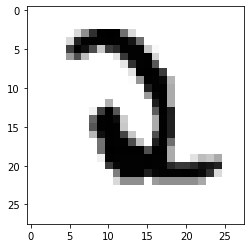

2


In [138]:
show_imag(X,y_actual,400)

In [0]:
def convert_binary(y_actual):
  y1=np.zeros((len(y_actual),10))
  for i in range(len(y_actual)):
    y1[i][int(y_actual[i])]=1
    
    
  return y1

In [0]:
NumHlayers=10
NumHunits=30

In [0]:
y=convert_binary(y_actual)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((m,1)),X]
hidden=np.ones((NumHlayers,m,NumHunits+1))
z=np.ones((NumHlayers,m,NumHunits))
a=np.ones((NumHlayers,m,NumHunits))
d=np.ones((NumHlayers,m,NumHunits+1))
ITheta=np.random.rand(n+1,NumHunits)
#Igrad=np.zeros((n+1,NumHunits))
HTheta=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HTGrad=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HGrad=np.zeros((NumHlayers,NumHunits+1))
ETheta=np.random.rand(NumHunits+1,s)
#EGrad=np.zeros((NumHunits+1,s))
for rota in range(1000000):
  z[0]=np.matmul(X_with_bias,ITheta)
  a[0]=1/(1+np.exp(-1*z[0]))
  hidden[0]=np.c_[np.ones((m,1)),a[0]]
  for i in range(NumHlayers-1):
    z[i+1]=np.matmul(hidden[i],HTheta[i])
    a[i+1]=1/(1+np.exp(-1*z[i+1]))
    hidden[i+1]=np.c_[np.ones((m,1)),a[i+1]]
  pred=1/(1+np.exp(-1*np.matmul(hidden[i+1],ETheta)))
  cost=sum(((pred-y)**2).transpose()).reshape(-1,1)
  if(rota%10000==0):
    print(sum(cost),pred[0])
  dpred=y-pred
  #Egrad_init=np.zeros((m,NumHunits+1,s))
  Egrad=np.matmul((hidden[NumHlayers-1].transpose()),(2*dpred)*(pred*(1-pred)))/1000
  HGrad[NumHlayers-1]=sum(np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())).reshape(1,-1)
  for j in range(NumHlayers-1):
    k=NumHlayers-j-2
    HTGrad[k]=np.matmul((sum(hidden[k]).reshape(1,-1)).transpose(),((((sum(a[k+1])).reshape(1,-1))*(((sum(1-a[k+1])).reshape(1,-1))))*(HGrad[k+1,1:NumHunits+1].reshape(1,-1))))
    HGrad[k]=np.matmul(((((sum(a[k+1])).reshape(1,-1))*(((sum(1-a[k+1])).reshape(1,-1))))*(HGrad[k+1,1:NumHunits+1].reshape(1,-1))),HTheta[k].transpose())
  ETheta=ETheta+Egrad*0.1
  HTheta=HTheta+HTGrad*0.1

  
  



[8999.98086264] [0.99999975 0.99999932 0.99999976 0.99999975 0.99999985 0.99999149
 0.99999987 0.99999991 0.99999976 0.99999997]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


[899.102] [0.09700001 0.116      0.09900001 0.09300003 0.105      0.09200004
 0.09400002 0.117      0.08700013 0.1       ]
[899.102] [0.097 0.116 0.099 0.093 0.105 0.092 0.094 0.117 0.087 0.1  ]


In [0]:
for c in range(1000):
  print(np.where(pred[c]==np.amax(pred[c])))

In [0]:
y_actual[1]

In [0]:
y[0]

In [0]:
X[2]

In [0]:
HGrad[9]

In [0]:
HTGrad[8]

In [0]:
np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())

In [0]:
Egrad

In [0]:
pred

In [0]:
ETheta